# 1. DATA PROCESSING FOR MACHINE LEARNING

In [1]:
# for data manipulations
import pandas as pd
import numpy as np
import math

# for data visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks',color_codes=True)

# for data processing
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

sns.set(style='ticks',color_codes=True)

import random

seed = 42 #seed for reproducibility
random.seed(seed)
np.random.seed(seed)

import warnings
warnings.filterwarnings("ignore")

In [2]:
auto_trader = pd.read_csv("adverts.csv")

auto_trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


##### Null values recorded in columns like mileage, reg_code, fuel_type, body_type, year_of_registration and standard_colour.

In [3]:
auto_trader.head(7)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol
6,202007080998445,24075.0,17,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol


##### The output above shows that we have around 402,005 entries with 12 columns

In [4]:
# this will check for duplicates
if len(auto_trader[auto_trader.duplicated()]) > 0:
    print(" Duplicated entries are: ", len(auto_trader[auto_trader.duplicated()]))
    print(auto_trader[auto_trader.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [5]:
# descriptive statistics
auto_trader.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
public_reference,402005.0,NaN,NaN,NaN,202007077472447.78125,16916615997.343893,201307177852187.0,202009023197699.0,202009304400624.0,202010175124399.0,202011025683478.0
mileage,401878.0,NaN,NaN,NaN,37743.595656,34831.724018,0.0,10481.0,28629.5,56875.75,999999.0
reg_code,370148,72,17,36738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_colour,396627,22,Black,86287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_make,402005,110,BMW,37376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_model,402005,1168,Golf,11583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_condition,402005,2,USED,370756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_registration,368694.0,NaN,NaN,NaN,2015.006206,7.962667,999.0,2013.0,2016.0,2018.0,2020.0
price,402005.0,NaN,NaN,NaN,17341.965799,46437.460951,120.0,7495.0,12600.0,20000.0,9999999.0
body_type,401168,16,Hatchback,167315,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking for missing values
auto_trader.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [7]:
auto_trader.shape

(402005, 12)

## Summary of the entire dataset
- The dataset has over 400k observations. I will try to some random visualizations on it before manipulating the data
- There are no duplicates in the data set
- the missing values in mileage, fuel_type and body_type are significantly small, so we can afford to drop those rows.

#### Analysis of price and mileage

In [8]:
def distribution_viz(data):
    '''
    This function will make a distribution (graph) and display it
    '''
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(1, 2, figsize = (10,7))
    
    # Plot the histogram
    ax[0].hist(data)
    ax[0].set_ylabel('Frequency')
    # Plot the boxplot
    #ax[1].boxplot(col)
    sns.boxplot(data, orient="h",ax=ax[1])
    ax[1].set_xlabel('Value')
    # Add a title to the Figure
    fig.suptitle('Distribution')
    # Show the figure

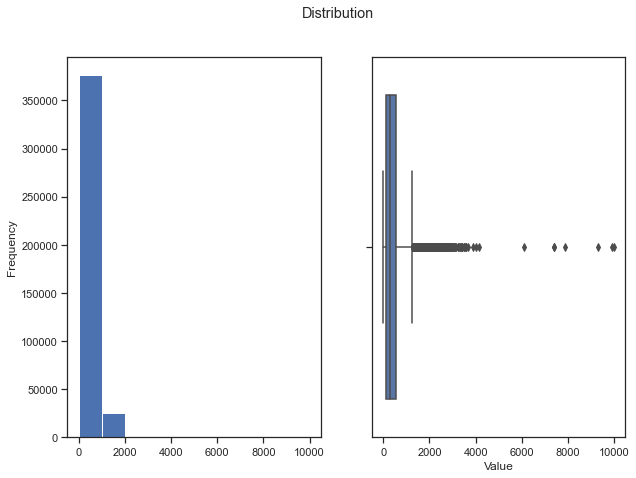

In [9]:
#for mileage distribution
distribution_viz(auto_trader["mileage"]/100);

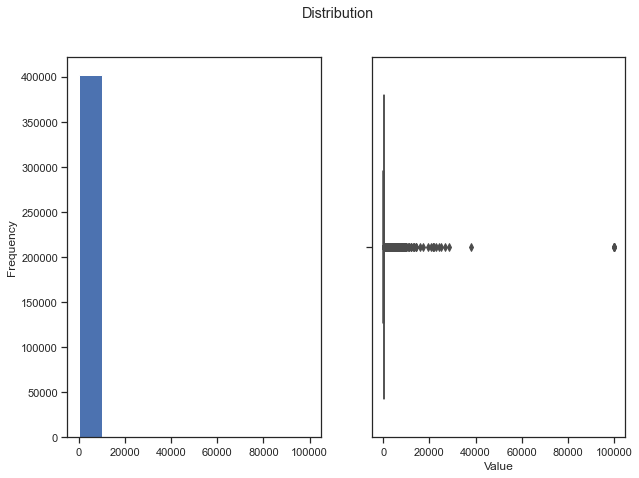

In [10]:
# for price distribution
distribution_viz(auto_trader["price"]/100);

- both the price and mileage columns have dangerous outliers that we may have to deal with in the future

In [11]:
# importing extra visualization tools
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [12]:
# let's also try it for the price distribution
#fig = px.scatter(auto_trader, x ='price')

#fig.update_layout(
    #title = 'Price distribution',
    #xaxis_title = 'price',
    #yaxis_title = 'Count'
#)
   
#fig.show()

- it is easier to see the outliers from the last two illustrations above

#### Going forward, in order to reduce computational time and cognitive load, we will be using just a small sample (say 10%) of the entire dataset.

In [13]:
# Set the seed for reproducibility
# random.seed(42)

# Get the number of rows in the dataset
n_rows = auto_trader.shape[0]

# Randomly select 10% of the rows
sample_size = int(n_rows * 0.1)
sample_indices = random.sample(range(n_rows), sample_size)
auto_trade = auto_trader.iloc[sample_indices, :]

In [14]:
auto_trader.shape[0]

402005

In [15]:
auto_trade.shape

(40200, 12)

In [16]:
auto_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40200 entries, 335243 to 54564
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       40200 non-null  int64  
 1   mileage                40180 non-null  float64
 2   reg_code               36976 non-null  object 
 3   standard_colour        39640 non-null  object 
 4   standard_make          40200 non-null  object 
 5   standard_model         40200 non-null  object 
 6   vehicle_condition      40200 non-null  object 
 7   year_of_registration   36828 non-null  float64
 8   price                  40200 non-null  int64  
 9   body_type              40115 non-null  object 
 10  crossover_car_and_van  40200 non-null  bool   
 11  fuel_type              40139 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [17]:
auto_trade.isna().sum()

public_reference            0
mileage                    20
reg_code                 3224
standard_colour           560
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     3372
price                       0
body_type                  85
crossover_car_and_van       0
fuel_type                  61
dtype: int64

- the missing values are relatively smaller now, and we will try to fill them up
- the <i><b> crossover_car_and_van </b></i> column is of boolean data type and we will probably do a mapping on it later on
- the shape of our sample data is 40,200 rows by 12 columns.

In [18]:
auto_trade.head(7)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
335243,202009093527106,25880.0,62,Silver,Honda,CR-V,USED,2012.0,8995,SUV,False,Petrol
58369,202007301877111,71000.0,13,Silver,Toyota,Previa,USED,2013.0,12495,MPV,False,Petrol
13112,202009023232968,73000.0,10,Silver,Renault,Clio,USED,2010.0,2000,Hatchback,False,Petrol
388786,202009284311955,0.0,NaN,Grey,Citroen,Berlingo,NEW,NaN,19567,MPV,False,Diesel
144194,202008042087058,5000.0,68,Grey,MINI,Clubman,USED,2018.0,16499,Estate,False,Petrol
128393,202009284303147,14308.0,19,White,BMW,1 Series,USED,2019.0,25780,Hatchback,False,Petrol
117026,202007301877900,3850.0,68,Grey,Rolls-Royce,Dawn,USED,2019.0,210000,Convertible,False,Petrol


In [19]:
auto_trade.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
public_reference,40200.0,NaN,NaN,NaN,202007006871157.1875,17205006606.71244,201506234588251.0,202009013191633.75,202009304393980.5,202010175116744.0,202011015683289.0
mileage,40180.0,NaN,NaN,NaN,37838.150075,35215.544056,0.0,10500.0,28664.5,56448.5,999999.0
reg_code,36976,60,17,3711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_colour,39640,20,Black,8636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_make,40200,77,BMW,3712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_model,40200,789,Golf,1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_condition,40200,2,USED,37034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_registration,36828.0,NaN,NaN,NaN,2014.999919,8.604672,1007.0,2013.0,2016.0,2018.0,2020.0
price,40200.0,NaN,NaN,NaN,17209.654502,26038.763613,250.0,7495.0,12500.0,20000.0,2400000.0
body_type,40115,15,Hatchback,16749,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- the <i><b> public_reference </b></i> column is obviously not going to be a good predictor, hence we have to drop later
- the average <i><b> mileage </b></i> 38016 miles whilst having a maximum value of 339654
- from our sample, we have 62 unique <i><b> reg_code </b></i> numbers. The <i><b> reg_code </b></i> 17 appeared over 3000 times whilst the least used reg_code is 95 which appeared just once
- average <i><b> price </b></i> is less than 18000 but the most expensive car costs up to 10M, according to our sample data.

###### making another histogram and boxplot for both price and mileage, this time on the sample dataset

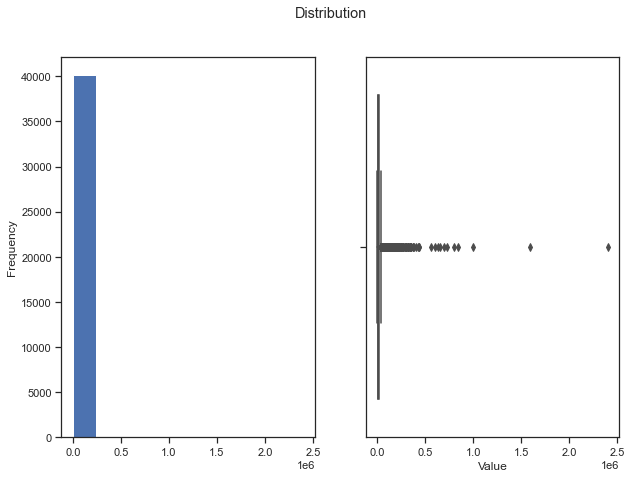

In [20]:
distribution_viz(auto_trade["price"])

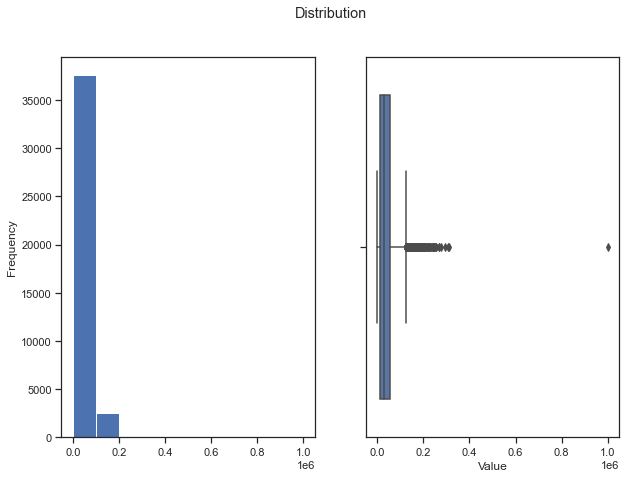

In [21]:
distribution_viz(auto_trade["mileage"])

- outliers still exist in the sample data

# 2. FEATURE ENGINEERING

In [22]:
#price_Q1 = auto_trade["price"].quantile(0.25) #for the first quartile
#price_Q3 = auto_trade["price"].quantile(0.75) #for the third quartile
#price_Q3, price_Q1

In [23]:
#price_IQR = price_Q3 - price_Q1
#price_upper = price_Q3 + (1.5 * price_IQR)
#price_upper

In [24]:
#mile_Q1 = auto_trade["mileage"].quantile(0.25) #for the first quartile
#mile_Q3 = auto_trade["mileage"].quantile(0.75) #for the third quartile
#mile_Q3, mile_Q1

In [25]:
#mile_IQR = mile_Q3 - mile_Q1
#mile_upper = mile_Q3 + (1.5 * mile_IQR)
#mile_upper

- the above calculation is just a simple guide

In [26]:
# create a function to drop outliers using the interquartile range
# Then we drop the outliers using the price column
def drop_outliers(obs, col):
    Q1 = obs[col].quantile(0.25)
    Q3 = obs[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = Q3 + 1.5 * IQR
    x = (obs[obs[col] < upper_lim]).reset_index(drop=True)
    return x

In [27]:
# drop outliers from price
auto_trade = drop_outliers(auto_trade,"price")

In [28]:
# drop outliers from price
auto_trade = drop_outliers(auto_trade,"mileage")

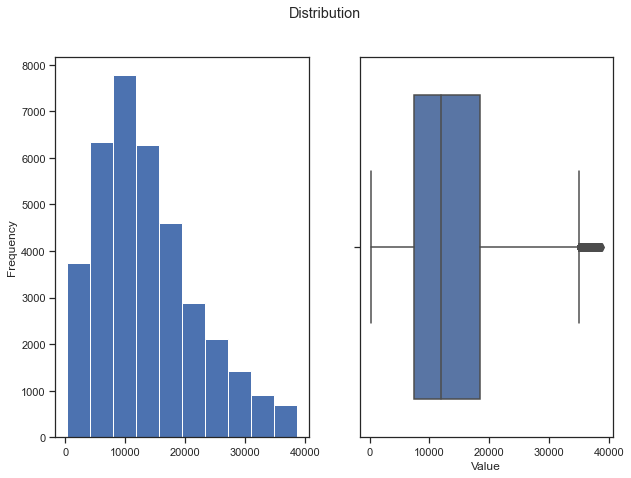

In [29]:
# let us now see what the price column loks like
distribution_viz(auto_trade["price"])

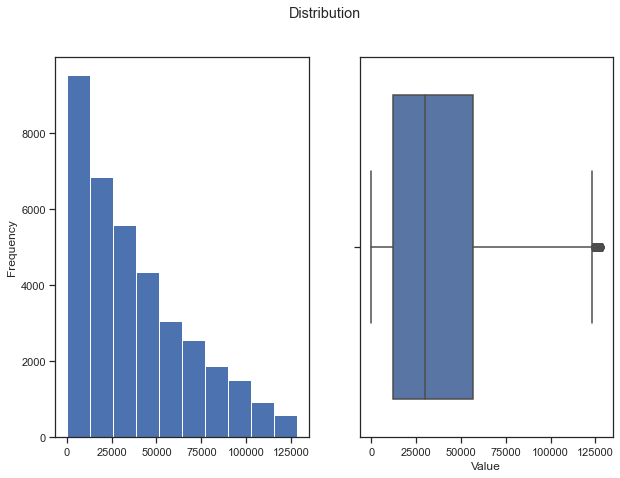

In [30]:
# let us now see what the mileage column loks like
distribution_viz(auto_trade["mileage"])

In [31]:
# let's seee other columns with missing values
auto_trade.isna().sum()

public_reference            0
mileage                     0
reg_code                 2376
standard_colour           449
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     2501
price                       0
body_type                  71
crossover_car_and_van       0
fuel_type                  48
dtype: int64

- Now, we won't be carrying out any engineering on reg_code and public_reference because they will be dropped. They are less likely to be good predictors.

- Starting from the top;

###### standard_colour

In [32]:
auto_trade["standard_colour"].value_counts(dropna=False)

Black          7697
White          6671
Grey           6034
Blue           5527
Silver         4598
Red            3931
NaN             449
Green           401
Orange          350
Yellow          202
Brown           195
Multicolour     169
Beige           135
Bronze          127
Purple          110
Gold             71
Pink             43
Turquoise        37
Maroon           13
Burgundy          3
Magenta           2
Name: standard_colour, dtype: int64

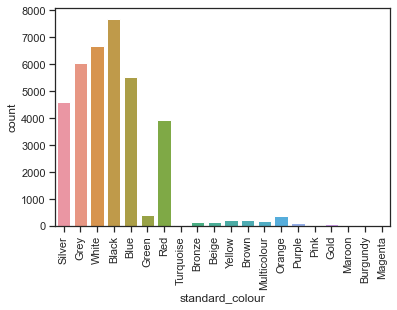

In [33]:
sns.countplot(auto_trade["standard_colour"])
plt.xticks(rotation=90);

- The standard colour has about 6 colours with values more than 4000 whilst the remaining combined don't even add up to 2000. Let's transform the standard colour to have 7 columns only

In [34]:
auto_trade["standard_colour"] = auto_trade["standard_colour"].replace(['Beige', 'Orange', 'Green', 'Multicolour', 'Purple', 'Bronze', 'Pink',
                                                                       'Yellow', 'Brown', 'Gold', 'Turquoise', 'Maroon', 'Burgundy'],
                                                                      "Others")

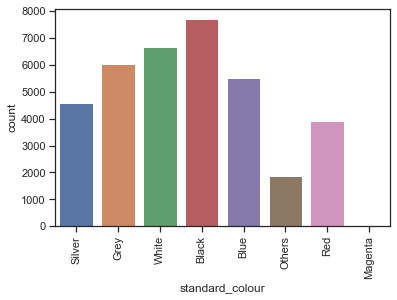

In [35]:
sns.countplot(auto_trade["standard_colour"])
plt.xticks(rotation=90);

###### year of registration

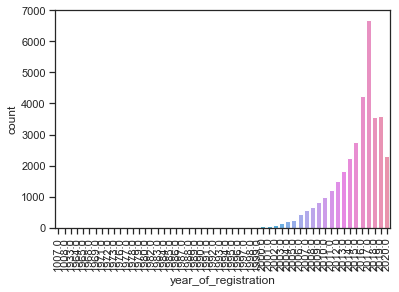

In [36]:
sns.countplot(auto_trade["year_of_registration"])
plt.xticks(rotation=90);

- so we can notice how the labels on the x-axis are so clogged up and overlapping on each other.
- The years before 2000 have very low values, and it seems they may not play big roles in our model. we, will, therefore make them one.

In [37]:
auto_trade["year_of_registration"] = auto_trade["year_of_registration"].apply(lambda x:x if x >= 2001 else 2000)

In [38]:
auto_trade["year_of_registration"] = auto_trade["year_of_registration"].astype(int)

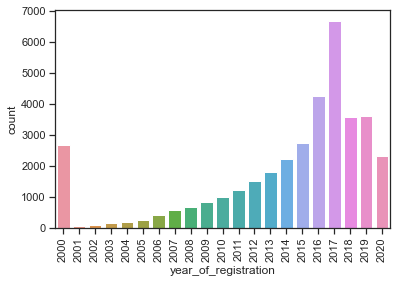

In [39]:
sns.countplot(auto_trade["year_of_registration"])
plt.xticks(rotation=90);

###### body type

In [40]:
auto_trade["body_type"].value_counts(dropna=False)

Hatchback      16449
SUV            10073
Saloon          3271
Estate          2248
Coupe           1721
MPV             1567
Convertible     1256
NaN               71
Pickup            58
Combi Van         18
Minibus           12
Limousine         12
Camper             4
Panel Van          3
Window Van         1
Chassis Cab        1
Name: body_type, dtype: int64

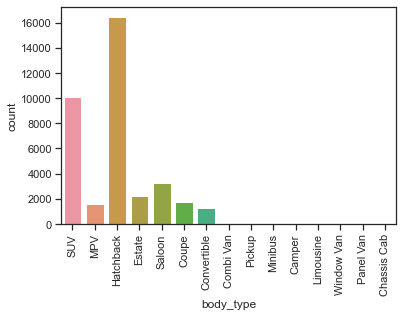

In [41]:
sns.countplot(auto_trade["body_type"])
plt.xticks(rotation=90);

- Just like we observed in the standard_colour column, the body_type column also has about 7 types with values more than 1200 whilst the remaining combined don't even add up to 200. Let's transform it to have 8 columns only

In [42]:
auto_trade["body_type"] = auto_trade["body_type"].replace(['Pickup', 'Combi Van', 'Limousine', 'Panel Van', 'Minibus',
                                                           'Window Van', 'Camper'],"Others")

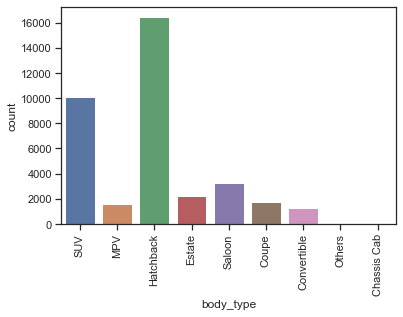

In [43]:
sns.countplot(auto_trade["body_type"])
plt.xticks(rotation=90);

###### fuel type

In [44]:
# let's check for the counts of the fuel_type column...
auto_trade["fuel_type"].value_counts(dropna=False)

Petrol                   20401
Diesel                   14171
Petrol Hybrid             1274
Petrol Plug-in Hybrid      418
Electric                   370
Diesel Hybrid               55
NaN                         48
Diesel Plug-in Hybrid       16
Bi Fuel                     12
Name: fuel_type, dtype: int64

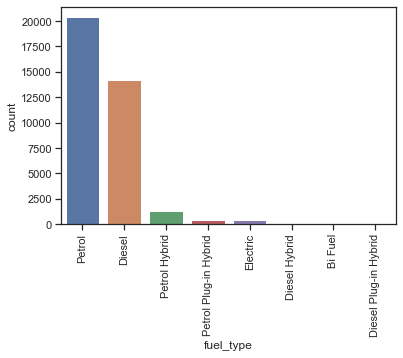

In [45]:
sns.countplot(auto_trade["fuel_type"])
plt.xticks(rotation=90);

In [46]:
auto_trade["fuel_type"] = auto_trade["fuel_type"].replace(['Petrol Hybrid', 'Electric', 'Petrol Plug-in Hybrid',
                                                           'Diesel Plug-in Hybrid','Bi Fuel', 'Diesel Hybrid'],
                                                          "Others")

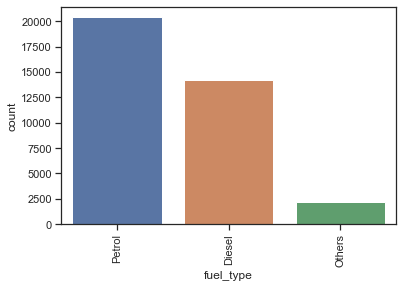

In [47]:
sns.countplot(auto_trade["fuel_type"])
plt.xticks(rotation=90);

###### vehicle condition

In [48]:
auto_trade["vehicle_condition"].value_counts()

USED    34431
NEW      2334
Name: vehicle_condition, dtype: int64

In [49]:
auto_trade["vehicle_condition"] = auto_trade["vehicle_condition"].map({"USED":0,"NEW":1})

###### crossover car and van

In [50]:
auto_trade["crossover_car_and_van"].value_counts()

False    36626
True       139
Name: crossover_car_and_van, dtype: int64

In [51]:
auto_trade["crossover_car_and_van"] = auto_trade["crossover_car_and_van"].map({False:0, True:1})

In [52]:
auto_trade.isna().sum()

public_reference            0
mileage                     0
reg_code                 2376
standard_colour           449
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
body_type                  71
crossover_car_and_van       0
fuel_type                  48
dtype: int64

In [53]:
auto_trade.shape

(36765, 12)

In [54]:
#!pip install phik

# 3. FEATURE SELECTION AND DIMENSIONALITY REDUCTION

- We can Identify highly correlated features using the heatmap.
- we'd be bringing in the phik library for this purpose

In [55]:
import phik

In [56]:
corr_matrix = auto_trade.phik_matrix()

interval columns not set, guessing: ['public_reference', 'mileage', 'vehicle_condition', 'year_of_registration', 'price', 'crossover_car_and_van']


<AxesSubplot:>

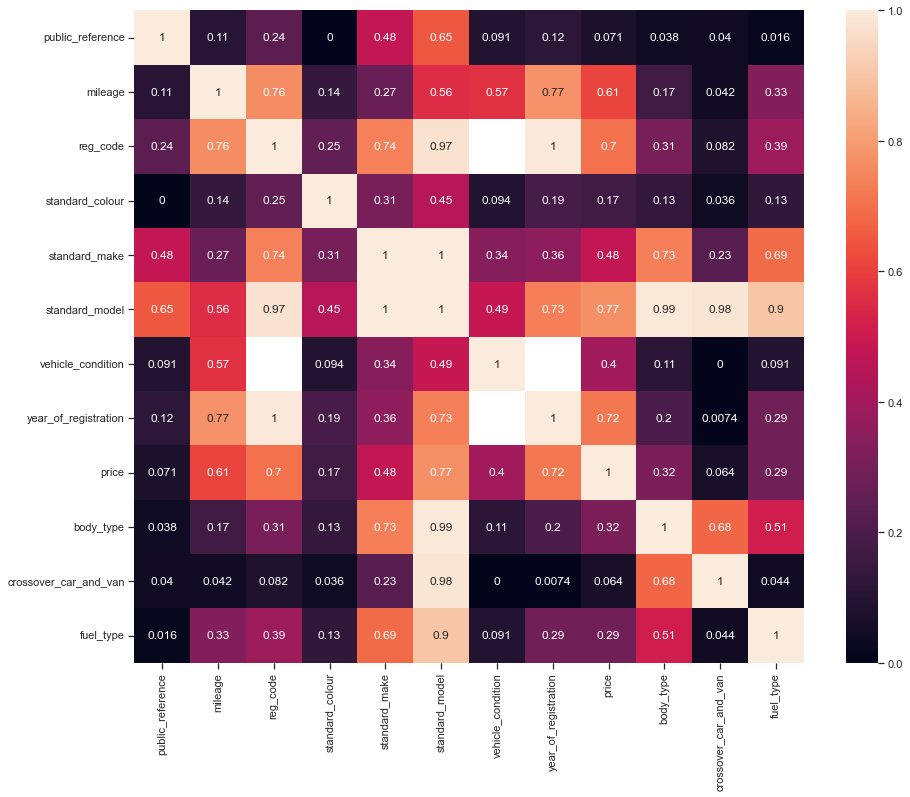

In [57]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True)

In [58]:
# Slicing the dataset to display the correlated columns with "price" with greater values on the top.
corr_matrix["price"].sort_values(ascending=False)

price                    1.000000
standard_model           0.765659
year_of_registration     0.718305
reg_code                 0.702890
mileage                  0.611160
standard_make            0.479210
vehicle_condition        0.401494
body_type                0.316364
fuel_type                0.292842
standard_colour          0.169065
public_reference         0.070769
crossover_car_and_van    0.064006
Name: price, dtype: float64

###### Splitting into train and test

In [59]:
#spliting of the target variable and dropping the irrelevant ones
X = auto_trade.drop(labels=["public_reference","reg_code","price"], axis=1)
y = auto_trade["price"]

- We are dropping <i><b> reg_code </b></i> because it is somewhat similar to the <b><i>year_of_registration </i></b>column. They seem to be pairwise correlated.

In [60]:
X.shape, y.shape

((36765, 9), (36765,))

- We cannot one-hot encode both the <i><b> standard_make </b></i> and <i><b> standard_model </b></i> columns because it means we will be having a lot of features to deal with. Our model(s) won't do well in this case.
- A good thing to do is to target encode both columns.

In [61]:
tar_enc = TargetEncoder(cols=["standard_make","standard_model"]).fit(X,y)

In [62]:
# before transforming
X.head(7)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
0,25880.0,Silver,Honda,CR-V,0,2012,SUV,0,Petrol
1,71000.0,Silver,Toyota,Previa,0,2013,MPV,0,Petrol
2,73000.0,Silver,Renault,Clio,0,2010,Hatchback,0,Petrol
3,0.0,Grey,Citroen,Berlingo,1,2000,MPV,0,Diesel
4,5000.0,Grey,MINI,Clubman,0,2018,Estate,0,Petrol
5,14308.0,White,BMW,1 Series,0,2019,Hatchback,0,Petrol
6,25.0,Black,Mazda,Mazda3,0,2020,Hatchback,0,Petrol


In [63]:
X = tar_enc.transform(X)

In [64]:
# after transforming
X.head(7)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
0,25880.0,Silver,11080.469055,15127.212549,0,2012,SUV,0,Petrol
1,71000.0,Silver,11314.062130,14165.041423,0,2013,MPV,0,Petrol
2,73000.0,Silver,10652.564479,8329.025751,0,2010,Hatchback,0,Petrol
3,0.0,Grey,8601.038049,13757.407342,1,2000,MPV,0,Diesel
4,5000.0,Grey,12380.500870,14176.076028,0,2018,Estate,0,Petrol
5,14308.0,White,17046.675301,12866.591036,0,2019,Hatchback,0,Petrol
6,25.0,Black,13290.447407,12665.213883,0,2020,Hatchback,0,Petrol


In [65]:
y.head(7)

0     8995
1    12495
2     2000
3    19567
4    16499
5    25780
6    23000
Name: price, dtype: int64

In [66]:
X.isna().sum()

mileage                    0
standard_colour          449
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration       0
body_type                 71
crossover_car_and_van      0
fuel_type                 48
dtype: int64

- Next, our job is to split into train and test data, then create a pipeline that transforms categorical features

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

In [69]:
from sklearn.feature_selection import SelectKBest, f_regression

In [70]:
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")), 
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary')),
        ("sbf", SelectKBest(f_regression, k="all"))
    ]
).set_output(transform='pandas')
print(categorical_features)
categorical_transformer

['standard_colour', 'body_type', 'fuel_type']


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False)),
                ('sbf',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x000001CD03A1E1F0>))])

- Here, we are to do the same numeric features

In [71]:
numeric_features = X_train.select_dtypes(exclude='object').columns.tolist()

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ('poly',PolynomialFeatures(interaction_only=True, include_bias=False)),
        ("scaler", StandardScaler())
    ]
).set_output(transform='pandas')

print(numeric_features)
numeric_transformer

['mileage', 'standard_make', 'standard_model', 'vehicle_condition', 'year_of_registration', 'crossover_car_and_van']


Pipeline(steps=[('imputer', SimpleImputer()),
                ('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('scaler', StandardScaler())])

In [74]:
#preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                               #("cat", categorical_transformer, categorical_features)])

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                               ("cat", categorical_transformer, categorical_features),],
                                 remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

In [75]:
auto_trade.shape

(36765, 12)

In [76]:
X_train.shape, X_test.shape

((29412, 9), (7353, 9))

In [77]:
y_train.shape, y_test.shape

((29412,), (7353,))

In [78]:
# Apply the preprocessor
preprocessor.fit(X_train, y_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

#### AUTOMATED FEATURE SELECTION

In [79]:
#Applying automated feature selection using Kbest
select = SelectKBest(f_regression, k=10)
select.fit(X_train, y_train)

X_train_kbest = select.transform(X_train)
X_test_kbest = select.transform(X_test)

In [80]:
X_train_kbest

array([[ 0.18646122, -1.00054785, -0.87857767, ..., -0.24410392,
        -0.87924178,  1.        ],
       [-0.61103569, -0.51279957, -1.14499163, ..., -0.24410392,
        -1.14237698,  1.        ],
       [ 0.95979155,  0.90158623,  0.21292673, ..., -0.24410392,
         0.21100705,  0.        ],
       ...,
       [-1.0264752 , -0.79162879, -1.0255961 , ..., -0.24410392,
        -1.02127718,  1.        ],
       [-0.71936639,  1.25432944,  1.02443782, ..., -0.24410392,
         1.02886282,  0.        ],
       [-1.19876675, -0.63575612, -1.29915264, ..., -0.24410392,
        -1.29466689,  1.        ]])

##### DIMENSIONALITY REDUCTION

In [81]:
from sklearn.decomposition import PCA

In [82]:
#Dimensionality reduction using PCA
pca_full = PCA()
pca_full.fit(X_train)

PCA()

In [83]:
pca_full.explained_variance_ratio_

array([2.44687583e-01, 2.10312431e-01, 1.96042262e-01, 1.35154857e-01,
       4.32787451e-02, 3.24060561e-02, 3.05248228e-02, 1.58473905e-02,
       9.54735694e-03, 9.13863684e-03, 8.93604732e-03, 8.21471508e-03,
       7.46596857e-03, 6.64915726e-03, 5.53403567e-03, 5.37161739e-03,
       4.59438951e-03, 4.44113206e-03, 3.39148591e-03, 3.11469038e-03,
       2.40272415e-03, 2.30133333e-03, 2.20251718e-03, 1.85487508e-03,
       1.79179986e-03, 1.49493171e-03, 1.39231123e-03, 8.74468685e-04,
       7.14380337e-04, 2.46694751e-04, 6.70233052e-05, 1.68294909e-06,
       1.65546998e-06, 8.03029792e-08, 6.73546828e-08, 6.05283414e-08,
       1.27073648e-08, 4.82561171e-32, 1.41402186e-33, 1.41402186e-33,
       1.41402186e-33])

In [84]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.24468758 0.21031243 0.19604226 0.13515486 0.04327874]


In [85]:
# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

Cumulative explained variance ratio: [0.24468758 0.45500001 0.65104228 0.78619713 0.82947588]


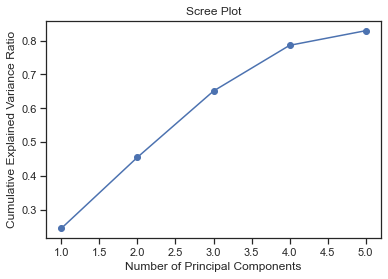

In [86]:
# Scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

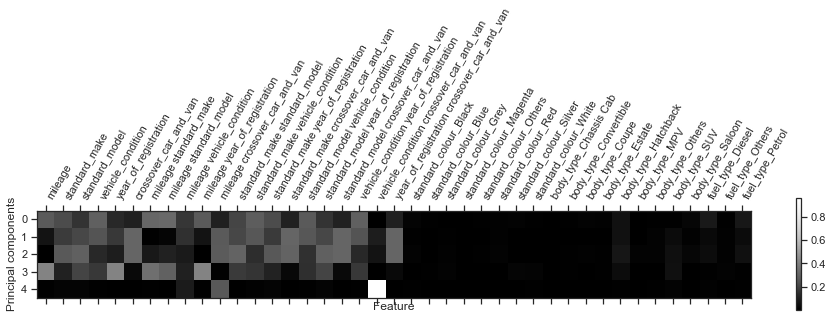

In [87]:
plt.matshow(np.abs(pca.components_), cmap='Greys_r')
plt.colorbar()
plt.xticks(range(len(X_train.columns)),
           X_train.columns,rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [90]:
# Reconstruct the dataset using selected principal components
#X_reconstructed = pca.inverse_transform(X_pca)

# 4. MODEL BUILDING.

### MODEL 1 - LINEAR MODEL

- build a pipeline for linear regression model

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lr = LinearRegression()

lr.fit(X_train_kbest, y_train)

LinearRegression()

In [90]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [91]:
lr.score(X_train_kbest, y_train), lr.score(X_test_kbest, y_test)

(0.7694590173618143, 0.7741786350633543)

In [92]:
lr_pred = lr.predict(X_test_kbest)

In [93]:
lr_scores = cross_val_score(lr, X_train_kbest, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross_val_score Root Mean Squared Error: {lr_scores.mean()*-1}")
print(f"Standard deviation of the scores: {lr_scores.std()}")

Cross_val_score Root Mean Squared Error: 3981.249122168666
Standard deviation of the scores: 56.72840647055428


In [94]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [95]:
#RMSE
lr_rmse = math.sqrt(mean_squared_error(y_test, lr_pred))
print(f"Root Mean Squared Error: {lr_rmse:.4f}")

Root Mean Squared Error: 3958.1095


In [96]:
#MAE
lr_mae = round(mean_absolute_error(y_test, lr_pred))
print(f'MAE: {lr_mae:.4f}')

MAE: 2810.0000


In [97]:
#SCORE MODEL
lr_r2 = round(r2_score(y_test, lr_pred), 4)
print(f'r2 score: {lr_r2:.4f}')

r2 score: 0.7742


### MODEL 2 - RANDOM FOREST

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rfr = RandomForestRegressor(max_depth=8, min_samples_split=15, min_samples_leaf=8)

rfr.fit(X_train_kbest, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=15)

In [105]:
rfr.score(X_train_kbest, y_train), rfr.score(X_test_kbest, y_test)

(0.8473746838056013, 0.837132699699674)

In [107]:
rfr_pred = rfr.predict(X_test_kbest)

In [108]:
rfr_scores = cross_val_score(rfr, X_train_kbest, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross_val_score Root Mean Squared Error: {rfr_scores.mean()*-1}")
print(f"Standard deviation of the scores: {rfr_scores.std()}")

Cross_val_score Root Mean Squared Error: 3405.521043701157
Standard deviation of the scores: 43.16859650445661


In [109]:
#RMSE
rfr_rmse = math.sqrt(mean_squared_error(y_test, rfr_pred))
print(f"Root Mean Squared Error: {rfr_rmse:.4f}")

Root Mean Squared Error: 3361.4158


In [110]:
#MAE
rfr_mae = round(mean_absolute_error(y_test, rfr_pred))
print(f'MAE: {rfr_mae:.4f}')

MAE: 2369.0000


In [111]:
#SCORE MODEL
rfr_r2 = round(r2_score(y_test, rfr_pred), 4)
print(f'r2 score: {rfr_r2:.4f}')

r2 score: 0.8371


###### applying GridSearch

In [113]:
parameters = {
    "n_estimators": [50,100,150],
    "max_depth": [2,3,4,5],
    "min_samples_leaf": [2,3,4,5]
}

In [114]:
rfr_grid = GridSearchCV(RandomForestRegressor(), param_grid=parameters,scoring="neg_root_mean_squared_error",
                          n_jobs=-1, verbose=1)

In [162]:
#rfr_grid = Pipeline( 
    #steps=[ ("preprocessor", preprocessor), 
           #("rfr_gridsearch", gridsearch)])

In [115]:
rfr_grid.fit(X_train_kbest, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [118]:
print(rfr_grid.best_estimator_) 
print(rfr_grid.best_params_)
print(-rfr_grid.best_score_)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=50)
{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 50}
3889.9234298426395


In [119]:
rfr.feature_importances_

array([0.25485206, 0.00680982, 0.01579964, 0.01403885, 0.10067859,
       0.09375969, 0.03085029, 0.00644583, 0.47358885, 0.00317639])

- applying the best parameters on the test set

In [120]:
rfr_best = rfr_grid.best_estimator_

rfr_best.fit(X_train_kbest, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=50)

In [121]:
rfr_best.score(X_train_kbest, y_train), rfr_best.score(X_test_kbest, y_test)

(0.784399406651564, 0.7816060246549527)

In [122]:
rfr_best_pred = rfr_best.predict(X_test_kbest)

In [123]:
rfr_best_scores = cross_val_score(rfr_best, X_train_kbest, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross_val_score Root Mean Squared Error: {rfr_best_scores.mean()*-1}")
print(f"Standard deviation of the scores: {rfr_best_scores.std()}")

Cross_val_score Root Mean Squared Error: 3893.73657252893
Standard deviation of the scores: 53.278867099900225


In [125]:
#RMSE
rfr_rmse_best = math.sqrt(mean_squared_error(y_test, rfr_best_pred))
print(f"Root Mean Squared Error: {rfr_rmse:.4f}")

Root Mean Squared Error: 3361.4158


In [126]:
#MAE
rfr_best_mae = round(mean_absolute_error(y_test, rfr_best_pred))
print(f'MAE: {rfr_best_mae:.4f}')

MAE: 2830.0000


In [127]:
#SCORE MODEL
rfr_best_r2 = round(r2_score(y_test, rfr_best_pred), 4)
print(f'r2 score: {rfr_best_r2:.4f}')

r2 score: 0.7816


### MODEL 3 - BOOSTED TREE

In [129]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [138]:
hgbst = HistGradientBoostingRegressor()

hgbst.fit(X_train_kbest, y_train)

HistGradientBoostingRegressor()

In [139]:
hgbst.score(X_train_kbest, y_train), hgbst.score(X_test_kbest, y_test)

(0.886390731204568, 0.8781652376554772)

In [140]:
hgbst_pred = hgbst.predict(X_test_kbest)

In [141]:
hgbst_scores = cross_val_score(hgbst, X_train_kbest, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross_val_score Root Mean Squared Error: {hgbst_scores.mean()*-1}")
print(f"Standard deviation of the scores: {hgbst_scores.std()}")

Cross_val_score Root Mean Squared Error: 2939.102250429641
Standard deviation of the scores: 40.35411706696296


In [142]:
#RMSE
hgbst_rmse = math.sqrt(mean_squared_error(y_test, hgbst_pred))
print(f"Root Mean Squared Error: {hgbst_rmse:.4f}")

Root Mean Squared Error: 2907.3071


In [143]:
#MAE
hgbst_mae = round(mean_absolute_error(y_test, hgbst_pred))
print(f'MAE: {rfr_mae:.4f}')

MAE: 2369.0000


In [144]:
#SCORE MODEL
hgbst_r2 = round(r2_score(y_test, hgbst_pred), 4)
print(f'r2 score: {hgbst_r2:.4f}')

r2 score: 0.8782


##### applying GridSearch

In [145]:
param_grid = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [2, 4, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "max_iter": [100, 200, 300, 600]
}

# Create the GridSearchCV object
hgbst_grid = GridSearchCV(hgbst, param_grid, cv=5, n_jobs=-1, verbose=1, scoring="neg_mean_squared_error")

# Fit the GridSearchCV object to the training data
hgbst_grid.fit(X_train_kbest, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [2, 4, 10, 20],
                         'max_iter': [100, 200, 300, 600],
                         'min_samples_leaf': [1, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [147]:
print(hgbst_grid.best_estimator_) 
print(hgbst_grid.best_params_)
print(-hgbst_grid.best_score_)

HistGradientBoostingRegressor(max_depth=20, max_iter=600, min_samples_leaf=10)
{'learning_rate': 0.1, 'max_depth': 20, 'max_iter': 600, 'min_samples_leaf': 10}
6853762.211224733


In [148]:
hgbst_best = hgbst_grid.best_estimator_

hgbst_best.fit(X_train_kbest, y_train)

HistGradientBoostingRegressor(max_depth=20, max_iter=600, min_samples_leaf=10)

In [149]:
hgbst_best.score(X_train_kbest, y_train), hgbst_best.score(X_test_kbest, y_test)

(0.9349626268017512, 0.907922815431588)

In [150]:
hgbst_best_pred = hgbst_best.predict(X_test_kbest)

In [151]:
hgbst_best_scores = cross_val_score(hgbst_best, X_train_kbest, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross_val_score Root Mean Squared Error: {hgbst_best_scores.mean()*-1}")
print(f"Standard deviation of the scores: {hgbst_best_scores.std()}")

Cross_val_score Root Mean Squared Error: 2609.864641693398
Standard deviation of the scores: 35.14720222369321


In [152]:
#RMSE
hgbst_rmse_best = math.sqrt(mean_squared_error(y_test, hgbst_best_pred))
print(f"Root Mean Squared Error: {hgbst_rmse:.4f}")

Root Mean Squared Error: 2907.3071


In [153]:
#MAE
hgbst_best_mae = round(mean_absolute_error(y_test, hgbst_best_pred))
print(f'MAE: {hgbst_best_mae:.4f}')

MAE: 1714.0000


In [154]:
#SCORE MODEL
hgbst_best_r2 = round(r2_score(y_test, hgbst_best_pred), 4)
print(f'r2 score: {hgbst_best_r2:.4f}')

r2 score: 0.9079


### AVERAGER/VOTER/STACKER ENSEMBLE

- IMPLEMENTING THE AVERAGER ENSEMBLE

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
# Perform averaging by taking the majority vote
averaged_pred = (lr_pred + rfr_pred + hgbst_pred) / 3

# Convert averaged predictions to the final class labels
#averaged_pred_labels = [1 if pred >= 0.5 else 0 for pred in averaged_pred]

# Evaluate the accuracy of the averaged predictions
#accuracy = accuracy_score(y_test, averaged_pred_labels)
#print("Averaged model accuracy:", accuracy)

In [157]:
averaged_pred

array([18359.2226046 , 10448.93864664, 10744.08935574, ...,
       17347.84460179,  7075.44719494,  1810.7556474 ])

### IMPLEMENTING THE VOTER REGRESSOR ENSEMBLE

In [158]:
from sklearn.ensemble import VotingRegressor

In [160]:
en_rf = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_leaf=2, max_features=20)
en_hgbst = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=20, max_iter=600, min_samples_leaf=10)

In [161]:
estimators=[('rfr', en_rf), ('hgbst', en_hgbst)]

In [162]:
voting_pipe = VotingRegressor(estimators=estimators)

In [163]:
# fitting the voting model
voting_pipe.fit(X_train_kbest, y_train)

VotingRegressor(estimators=[('rfr',
                             RandomForestRegressor(max_depth=5, max_features=20,
                                                   min_samples_leaf=2,
                                                   n_estimators=50)),
                            ('hgbst',
                             HistGradientBoostingRegressor(max_depth=20,
                                                           max_iter=600,
                                                           min_samples_leaf=10))])

In [164]:
voting_pred = voting_pipe.predict(X_test_kbest)
voting_pred

array([18205.21649918,  9942.240423  , 10543.04564922, ...,
       18048.59694405,  7007.63867807,  2414.83773585])

In [165]:
np.array((voting_pipe.predict(X_test_kbest), y_test)).T

array([[18205.21649918, 17475.        ],
       [ 9942.240423  ,  9000.        ],
       [10543.04564922,  9405.        ],
       ...,
       [18048.59694405, 16995.        ],
       [ 7007.63867807,  6490.        ],
       [ 2414.83773585,  1690.        ]])

In [166]:
voting_scores = cross_val_score(voting_pipe, X_train_kbest, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross_val_score Root Mean Squared Error: {voting_scores.mean()*-1}")
print(f"Standard deviation of the scores: {voting_scores.std()}")

Cross_val_score Root Mean Squared Error: 3048.9412195899486
Standard deviation of the scores: 44.378912874240996


In [167]:
#RMSE
voting_rmse = math.sqrt(mean_squared_error(y_test, voting_pred))
print(f"Root Mean Squared Error: {voting_rmse:.4f}")

Root Mean Squared Error: 2993.6762


In [168]:
#MAE
voting_mae = round(mean_absolute_error(y_test, voting_pred))
print(f'MAE: {voting_mae:.4f}')

MAE: 2116.0000


In [169]:
#SCORE MODEL
voting_r2 = round(r2_score(y_test, voting_pred), 4)
print(f'r2 score: {voting_r2:.4f}')

r2 score: 0.8708


### IMPLEMENTING THE STACKER REGRESSOR MODEL

In [171]:
from sklearn.ensemble import StackingRegressor

In [172]:
stacking_pipe = StackingRegressor(estimators=estimators,
                                      final_estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42))

In [173]:
stacking_pipe.fit(X_train_kbest, y_train)

StackingRegressor(estimators=[('rfr',
                               RandomForestRegressor(max_depth=5,
                                                     max_features=20,
                                                     min_samples_leaf=2,
                                                     n_estimators=50)),
                              ('hgbst',
                               HistGradientBoostingRegressor(max_depth=20,
                                                             max_iter=600,
                                                             min_samples_leaf=10))],
                  final_estimator=RandomForestRegressor(max_depth=5,
                                                        n_estimators=50,
                                                        random_state=42))

In [174]:
stacking_pred = stacking_pipe.predict(X_test_kbest)
stacking_pred

array([16337.46325271,  9455.71571841, 10237.57912935, ...,
       19768.23743616,  6456.09432854,  1737.59269193])

In [175]:
np.array((stacking_pipe.predict(X_test_kbest), y_test)).T

array([[16337.46325271, 17475.        ],
       [ 9455.71571841,  9000.        ],
       [10237.57912935,  9405.        ],
       ...,
       [19768.23743616, 16995.        ],
       [ 6456.09432854,  6490.        ],
       [ 1737.59269193,  1690.        ]])

In [176]:
stacking_scores = cross_val_score(stacking_pipe, X_train_kbest, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross_val_score Root Mean Squared Error: {stacking_scores.mean()*-1}")
print(f"Standard deviation of the scores: {stacking_scores.std()}")

Cross_val_score Root Mean Squared Error: 2639.4115881711746
Standard deviation of the scores: 40.531770965965435


In [177]:
#RMSE
stacking_rmse = math.sqrt(mean_squared_error(y_test, stacking_pred))
print(f"Root Mean Squared Error: {stacking_rmse:.4f}")

Root Mean Squared Error: 2521.9662


In [178]:
#MAE
stacking_mae = round(mean_absolute_error(y_test, stacking_pred))
print(f'MAE: {stacking_mae:.4f}')

MAE: 1728.0000


In [179]:
#SCORE MODEL
stacking_r2 = round(r2_score(y_test, stacking_pred), 4)
print(f'r2 score: {stacking_r2:.4f}')

r2 score: 0.9083


In [180]:
print(stacking_pipe.get_params());

{'cv': None, 'estimators': [('rfr', RandomForestRegressor(max_depth=5, max_features=20, min_samples_leaf=2,
                      n_estimators=50)), ('hgbst', HistGradientBoostingRegressor(max_depth=20, max_iter=600, min_samples_leaf=10))], 'final_estimator__bootstrap': True, 'final_estimator__ccp_alpha': 0.0, 'final_estimator__criterion': 'squared_error', 'final_estimator__max_depth': 5, 'final_estimator__max_features': 1.0, 'final_estimator__max_leaf_nodes': None, 'final_estimator__max_samples': None, 'final_estimator__min_impurity_decrease': 0.0, 'final_estimator__min_samples_leaf': 1, 'final_estimator__min_samples_split': 2, 'final_estimator__min_weight_fraction_leaf': 0.0, 'final_estimator__n_estimators': 50, 'final_estimator__n_jobs': None, 'final_estimator__oob_score': False, 'final_estimator__random_state': 42, 'final_estimator__verbose': 0, 'final_estimator__warm_start': False, 'final_estimator': RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42), 'n_jobs': N

### OVERALL PERFORMANCE WITH CROSS VALIDATION

In [237]:
# Define the list of models in the ensemble
models = [rfr_best, hgbst_best, voting_pipe, stacking_pipe]

# Iterate over the models and print the cross-validation scores
for i, model in enumerate(models):
    # Fit the model on the training data
    model.fit(X_train_kbest, y_train)

    # Calculate the cross-validation scores
    scores = cross_val_score(model, X_train_kbest, y_train, cv=10, scoring='neg_root_mean_squared_error')
    mean_score = -1 * scores.mean()
    std_score = scores.std()

    # Print the scores
    if i == len(models) - 1:
        print("StackingRegressor RMSE: {:.2f} (+/- {:.2f})".format(mean_score, std_score))
    else:
        print("{} RMSE: {:.2f} (+/- {:.2f})".format(type(model).__name__, mean_score, std_score))

RandomForestRegressor RMSE: 3894.67 (+/- 66.71)
HistGradientBoostingRegressor RMSE: 2595.69 (+/- 56.61)
VotingRegressor RMSE: 3040.57 (+/- 78.41)
StackingRegressor RMSE: 2605.92 (+/- 64.15)


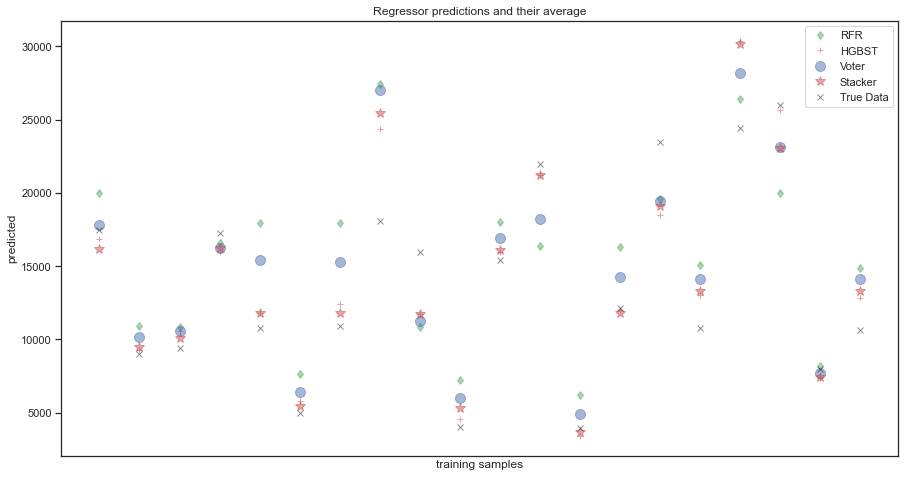

In [238]:
plt.figure(figsize=(15,8))
plt.plot(rfr_best.predict(X_test_kbest[:20]), "gd", alpha=0.5, label="RFR")
plt.plot(hgbst_best.predict(X_test_kbest[:20]), "r+", alpha=0.5, label="HGBST")
plt.plot(voting_pipe.predict(X_test_kbest[:20]), "bo", alpha=0.5, ms=10, label="Voter")
plt.plot(stacking_pipe.predict(X_test_kbest[:20]), "r*", alpha=0.5, ms=10, label="Stacker")
plt.plot(y_test.head(20).to_numpy(), "kx", alpha=0.5, label="True Data")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

### TRUE VS PREDICTED

In [239]:
new_pred = hgbst_best.predict(X_test_kbest)
mse = mean_squared_error(y_test, new_pred)
mae = mean_absolute_error(y_test,new_pred)
r2 = r2_score(y_test, new_pred)

print("Test MSE:", mse)
print("Test RMSE:", np.sqrt(mse))
print("Test R-squared:", r2)

Test MSE: 6381376.736611166
Test RMSE: 2526.138700984403
Test R-squared: 0.9080177989561844


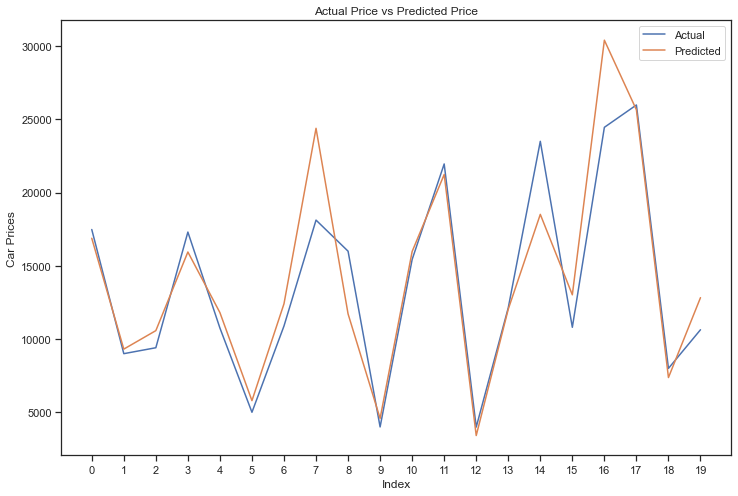

In [240]:
# Plot the Actual vs Predicted Evaluation 
ax = range(len(y_test[:20]))
plt.figure(figsize=(12,8))
plt.plot(ax, y_test[:20], label="Actual")
plt.plot(ax, new_pred[:20], label="Predicted")
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Index')
plt.ylabel('Car Prices')
plt.xticks(np.arange(20))
plt.legend()
plt.show()

# 5. MODEL EVALUATION AND ANALYSIS

### SHAP

In [241]:
#pip install shap

In [242]:
import shap
shap.initjs()

In [243]:
# Create an explainer object using the tree explainer
explainer = shap.TreeExplainer(hgbst_best)

In [244]:
value = pd.DataFrame(X_test_kbest, columns=select.get_feature_names_out())
shap_values = explainer(value)

In [245]:
# Calculate SHAP values
#rfr_shap_values = rfr_explainer.shap_values(rfr_pipe['preprocessor'].transform(X))

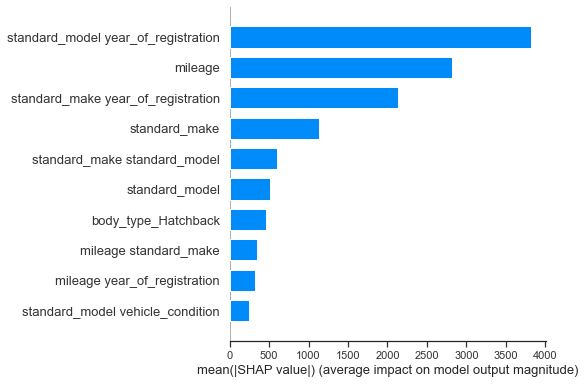

In [246]:
## for variable importance - global interpretability
shap.summary_plot(shap_values, plot_type="bar")

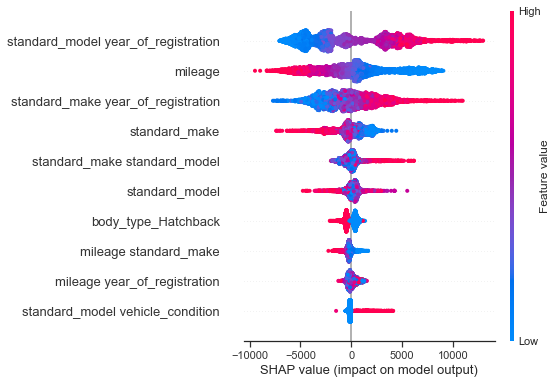

In [247]:
# Plot the SHAP summary plot
shap.summary_plot(shap_values)

### Partial Dependence Plot

In [248]:
from sklearn.inspection import PartialDependenceDisplay as pdp

In [249]:
value.columns

Index(['mileage', 'standard_make', 'standard_model', 'mileage standard_make',
       'mileage year_of_registration', 'standard_make standard_model',
       'standard_make year_of_registration',
       'standard_model vehicle_condition',
       'standard_model year_of_registration', 'body_type_Hatchback'],
      dtype='object')

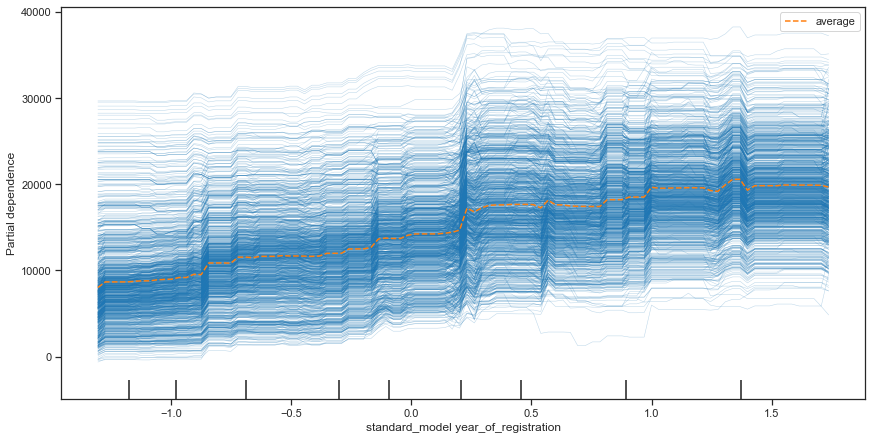

In [250]:
# Increase figure size and DPI
#plt.figure(figsize=(20, 15), dpi=800)

fig, ax = plt.subplots(figsize=(12,6), constrained_layout=True)

# Call PartialDependenceDisplay.from_estimator
pdp.from_estimator(
    hgbst_best, value, features=['standard_model year_of_registration'], kind='both', random_state=42, ax=ax, n_cols=1);

# Display the plot
#plt.show();

In [251]:
top_features=["standard_model year_of_registration", "mileage", "standard_make year_of_registration",
              "standard_make", "standard_make standard_model", "standard_model"]

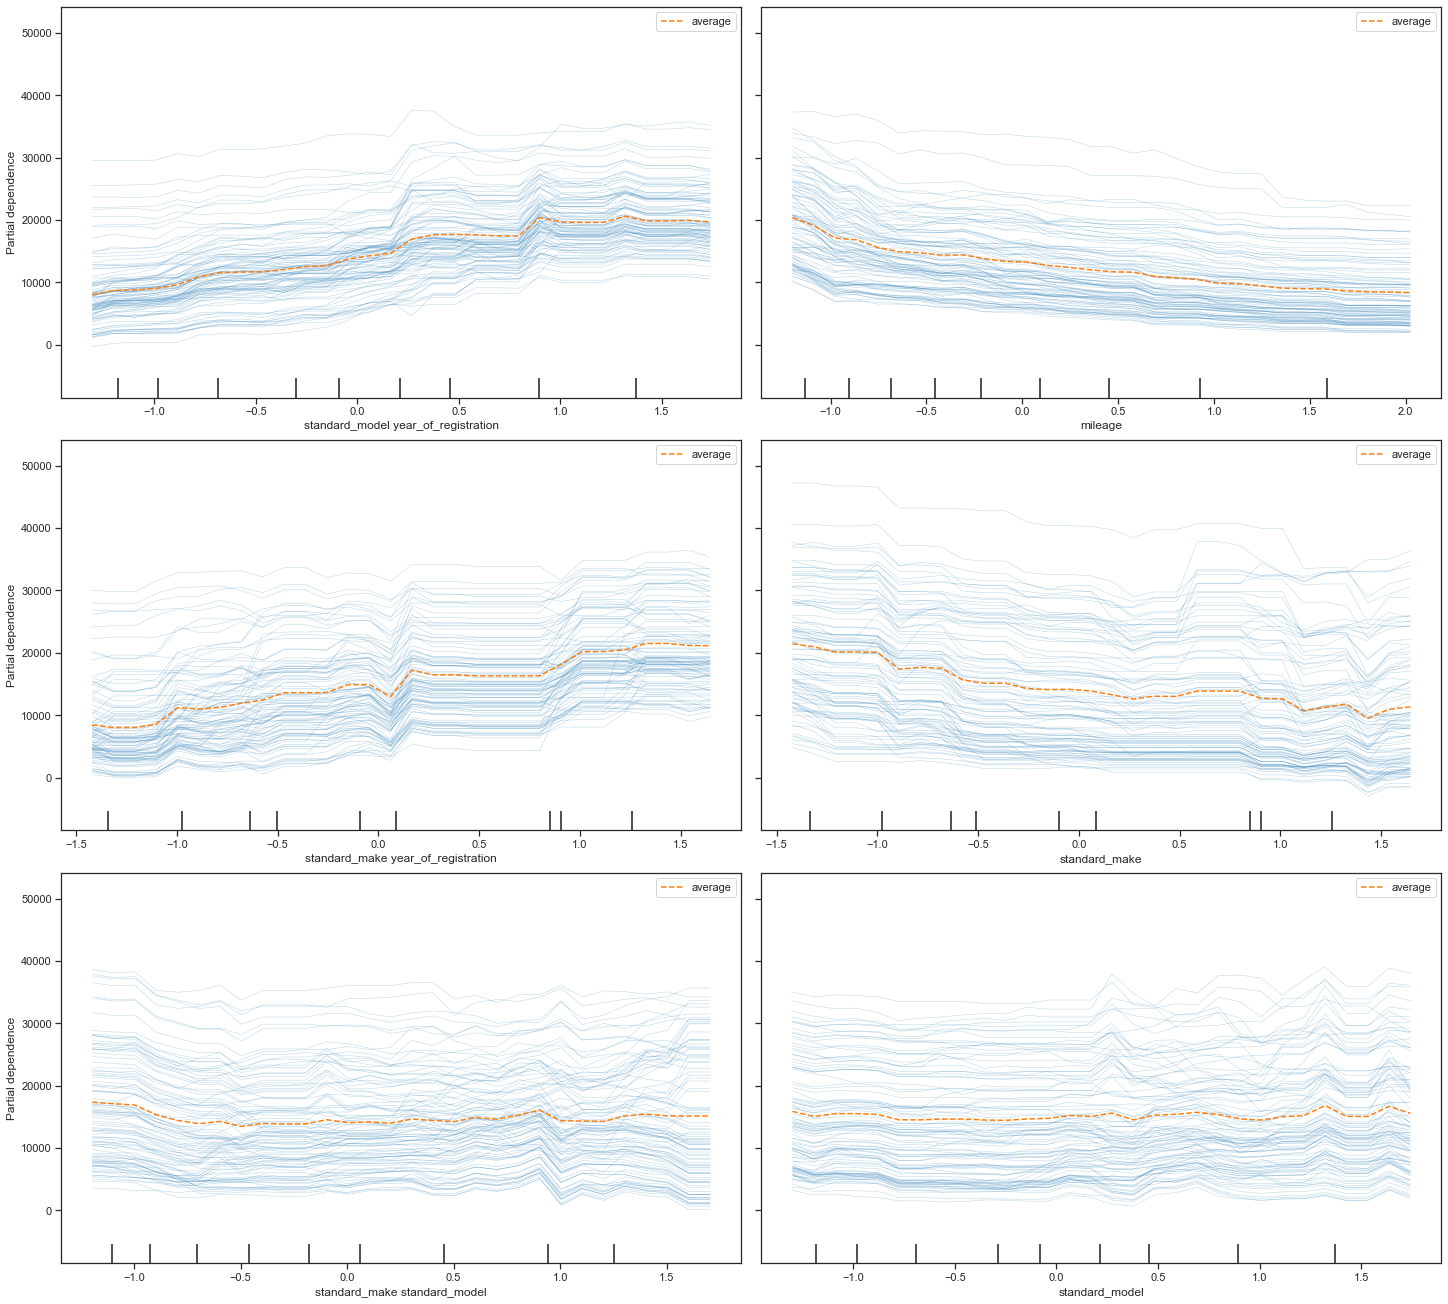

In [252]:
fig, ax = plt.subplots(figsize=(20,18), constrained_layout=True)
pdp.from_estimator(hgbst_best, value, features=top_features, kind='both',
                   subsample=100, grid_resolution=30, n_jobs=2, random_state=42, ax=ax, n_cols=2);

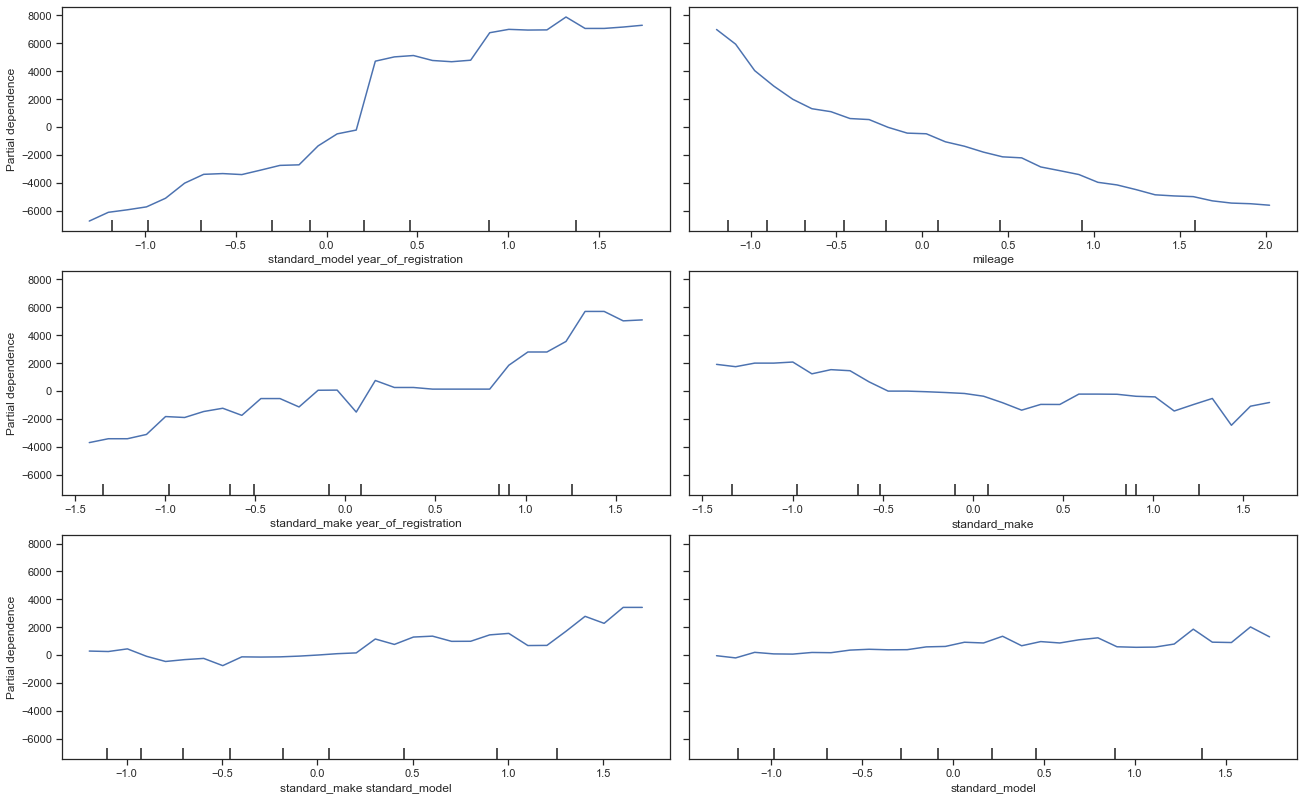

In [253]:
fig, ax = plt.subplots(figsize=(18,11), constrained_layout=True)
pdp.from_estimator(hgbst_best, value, features=top_features,kind='average',
                                        subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
                                        ax=ax, n_cols=2
);

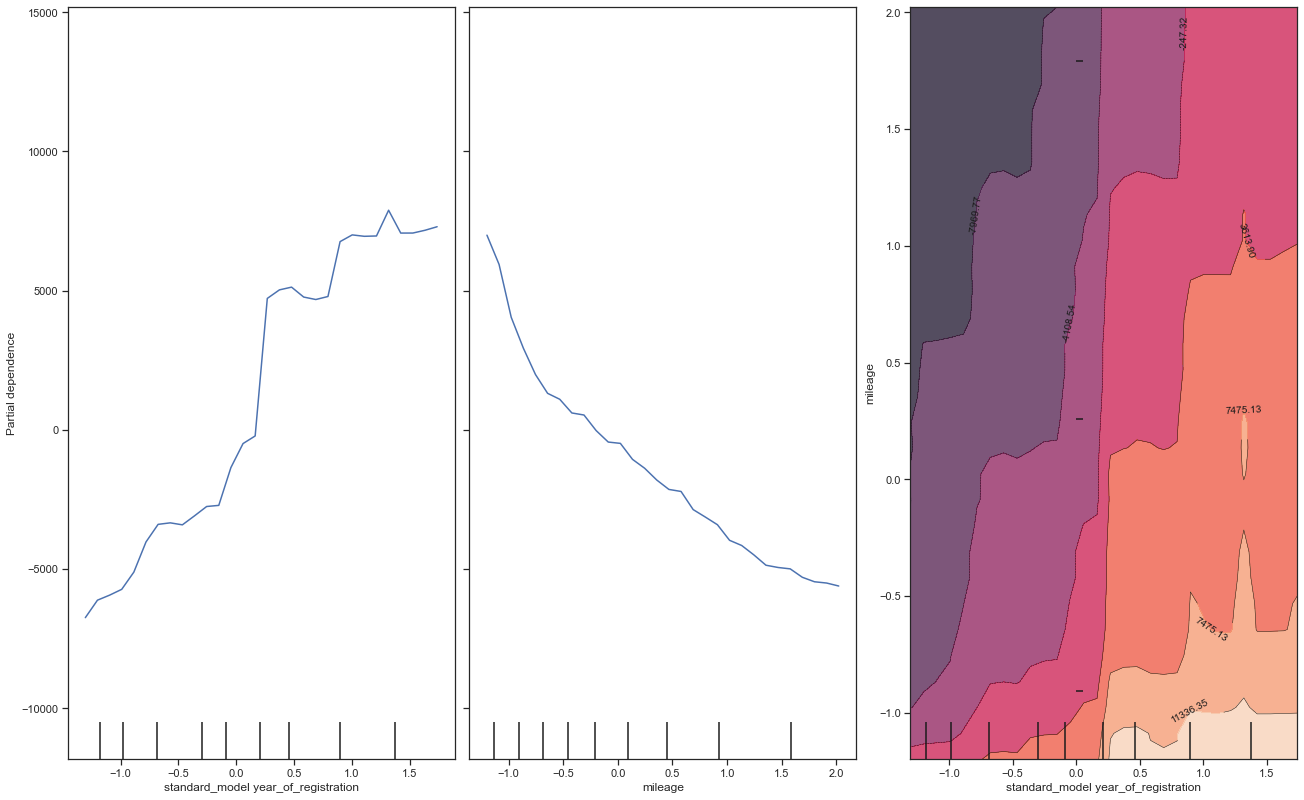

In [254]:
fig, ax = plt.subplots(figsize=(18,11), constrained_layout=True)
pdp.from_estimator(hgbst_best, value, features=["standard_model year_of_registration", "mileage",
                                                ("standard_model year_of_registration", "mileage")],
                   kind='average', ax=ax, n_cols=3,subsample=50, grid_resolution=30, n_jobs=2, random_state=0,
);

In [256]:
value.describe()

,mileage,standard_make,standard_model,mileage standard_make,mileage year_of_registration,standard_make standard_model,standard_make year_of_registration,standard_model vehicle_condition,standard_model year_of_registration,body_type_Hatchback
count,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000,7353.000000
mean,0.031073,0.004261,0.020359,0.024024,0.031056,0.015785,0.004218,-0.005175,0.020346,0.439820
std,1.011079,0.999985,1.015648,1.001717,1.011023,1.013184,1.000039,0.993857,1.015769,0.496399
min,-1.199089,-2.308542,-2.211776,-1.067974,-1.200894,-1.495490,-2.311576,-0.244104,-2.212403,0.000000
25%,-0.787516,-0.791629,-0.852244,-0.748294,-0.787874,-0.798257,-0.786148,-0.244104,-0.850273,0.000000
50%,-0.213673,-0.097420,-0.080088,-0.248870,-0.212502,-0.177420,-0.092453,-0.244104,-0.091585,0.000000
75%,0.669793,0.901586,0.747517,0.517788,0.670842,0.592736,0.894383,-0.244104,0.750029,1.000000
max,2.941451,2.869039,3.614766,5.054778,2.933610,3.802654,2.877793,8.143362,3.630667,1.000000
